In [2]:
from pandas import Series, DataFrame
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pylab
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Task A

In [3]:
#read in data
scores = pd.read_csv('assignment 3 sentiment scores.csv')
scores.head()

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0
1,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0
3,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0
4,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0


In [4]:
#initialize function to calculate directional switching

def diff_func(a,b):
    #find rows where a and b are directly compared
    filtered = scores[scores[a].notnull()]
    filtered = filtered[filtered[b].notnull()]
    
    #find the link weight, using Dichotomic-link graph formula from slides
    diff = sum(filtered[a]-filtered[b])/len(filtered)
    
    #determine direction of link, and return appropriate tuple
    if diff>0:
        #a has more positive sentiment when compared to b
        return (a, b, diff)
    elif diff<0:
        #b has more positive sentiment when compared to a
        return (b, a, -diff)
    else:
        #a and b have the same average sentiment when compared
        return

In [5]:
#cartesian product for unique directional tuples
#each tuple (a, b, weight) indicates that, when a and b are compared, the average sentiment is directed from b to a

edge_set = set()
for i in range(len(scores.columns)):
    for j in range(i+1, len(scores.columns)):
        edge_set.add(diff_func(scores.columns[i], scores.columns[j]))
        
print edge_set

set([('LS', 'Sclass', 0.15333333333333332), ('LS', 'A6', 1.1666666666666667), ('3series', '7series', 0.1), ('RX', 'XJ', 2.0), ('RX', 'Sclass', 1.6666666666666667), ('A8', '3series', 1.1428571428571428), ('LS', 'ES', 0.3939393939393939), ('RX', '7series', 2.8), ('A8', '5series', 0.8333333333333334), ('A6', 'XJ', 1.0), ('LS', '3series', 0.75), ('LS', 'A8', 0.17045454545454544), ('ES', '7series', 0.36363636363636365), ('A6', '3series', 0.14285714285714285), ('5series', 'A6', 0.5), ('LS', 'RX', 0.375), ('A8', '7series', 0.075), ('ES', 'A6', 1.4), ('LS', '7series', 0.34545454545454546), ('Sclass', '7series', 0.2391304347826087), ('XJ', '7series', 0.5714285714285714), ('7series', 'A6', 1.6666666666666667), ('XJ', 'LS', 0.2), ('XJ', '3series', 3.0), ('RX', 'A6', 3.6666666666666665), ('ES', 'A8', 0.18181818181818182), ('RX', '5series', 3.6), ('ES', 'Sclass', 0.4444444444444444), ('Sclass', 'XJ', 0.375), ('RX', '3series', 2.6666666666666665), ('ES', '5series', 1.75), ('5series', 'LS', 0.1904761

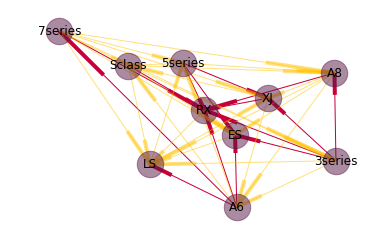

In [6]:
#make the ugly graph AKA option 1

G = nx.MultiDiGraph()

edge_set.discard(None)
for item in edge_set:
    G.add_edge(item[1], item[0], weight=item[2])

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >1]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=1]

pos=nx.spring_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='#581845', alpha=0.5)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1, edge_color='#C70039')
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color='#FFC300')

# labels
nx.draw_networkx_labels(G, pos, font_size=12)

plt.axis('off')
plt.show() # display

/anaconda/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/anaconda/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


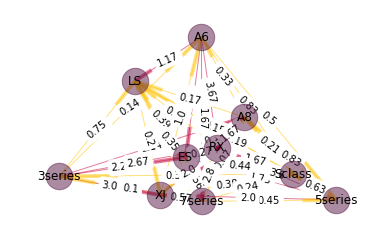

In [7]:
#even uglier graph AKA option 2

G = nx.DiGraph()

for item in edge_set:
    G.add_edge(item[1], item[0], weight=round(item[2],2))

red_edges = [(tup[1], tup[0]) for tup in edge_set if tup[2]>1]
edge_colors = ['#FFC300' if not edge in red_edges else '#C70039' for edge in G.edges()]

pos=nx.spring_layout(G)

edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])

nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G,pos, node_size=700, node_color='#581845', alpha=0.5, edge_color=edge_colors)

# labels
nx.draw_networkx_labels(G, pos, font_size=12)

plt.axis('off')
plt.show()

## Task B

In [15]:
models = ['A6','A8','3-series','5-series','7-series','XJ','ES','LS','RX','S-class']
sales = [20000,12000,220000,60000,14000,6600,135000,30000,120000,25000]
data = pd.DataFrame({
    'Model':models,
    'Sales':sales
})

data.sort_values('Sales',ascending=False,inplace=True)
data

,Model,Sales
2,3-series,220000
6,ES,135000
8,RX,120000
3,5-series,60000
7,LS,30000
9,S-class,25000
0,A6,20000
4,7-series,14000
1,A8,12000
5,XJ,6600


#### Notes:
Convert the NetworkX multigraph to a regular graph to run page rank.  

Link: https://stackoverflow.com/questions/28560876/is-there-a-way-to-run-pagerank-algorithm-on-networkxs-multigraph

In [16]:
H = nx.Graph()
for u,v,d in G.edges(data=True):
    w = d['weight']
    if H.has_edge(u,v):
        H[u][v]['weight'] += w
    else:
        H.add_edge(u,v,weight=w)

### Weighted Network Graph

In [17]:
un_ng = nx.pagerank(H)
un_ng

{'3series': 0.11785983099161096,
 '5series': 0.1118399560554508,
 '7series': 0.07835174761424891,
 'A6': 0.1212702813830892,
 'A8': 0.06384818582345443,
 'ES': 0.083873379861035,
 'LS': 0.051584713126335384,
 'RX': 0.20065576470465735,
 'Sclass': 0.06238278738529829,
 'XJ': 0.10833335305481956}

##### Correlation Coefficient 

In [18]:
import numpy as np
## Extract values from the pandas dataframe and the dictionary. 
np.corrcoef(un_ng.values(),data['Sales'])[0,1]

-0.047248729070032365

### Unweighted Network Graph

In [19]:
w_ng = nx.pagerank(H,weight='None')
w_ng

{'3series': 0.09392145882928798,
 '5series': 0.09392145882928797,
 '7series': 0.10405236078047467,
 'A6': 0.10405236078047467,
 'A8': 0.10405236078047467,
 'ES': 0.09392145882928798,
 'LS': 0.10405236078047467,
 'RX': 0.10405236078047467,
 'Sclass': 0.10405236078047467,
 'XJ': 0.09392145882928798}

##### Correlation Coefficient 

In [20]:
np.corrcoef(w_ng.values(),data['Sales'])[0,1]

0.013415415611712722